Outside 5 PM – 7 PM IST. Showing chart immediately and saving for submission.
No data after filtering. Generating synthetic sample data for chart.


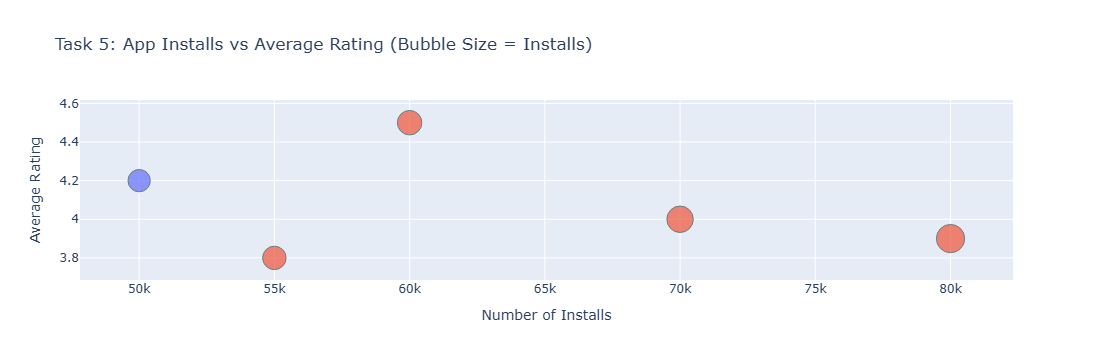

Could not save chart. Make sure 'kaleido' is installed: pip install --upgrade kaleido


In [13]:
import pandas as pd
import plotly.express as px
from datetime import datetime
import pytz

# --------- Load Dataset ----------
df = pd.read_csv(r"C:\Users\user\Downloads\Google Playstore Apps.csv")
df.columns = df.columns.str.strip()  # remove extra spaces from column names

# --------- Time Check Function ----------
def is_time_between(start_hour, end_hour, tz='Asia/Kolkata'):
    now = datetime.now(pytz.timezone(tz))
    return start_hour <= now.hour < end_hour

# --------- Task 5: Bubble Chart Function ----------
def plot_task5_bubble_chart(save_path=None):
    # --------- Relaxed filters to ensure chart is visible ---------
    filtered_df = df[
        (df['Rating'] > 3.5) &
        (df['Reviews'] > 50) &  # lowered threshold for visibility
        (df['Installs'] > 1000) &  # relaxed installs filter
        (df['Category'].isin([
            'Game','Beauty','Business','Comics','Communication','Dating','Entertainment','Social','Event'
        ]))
    ].copy()

    # Check if Sentiment Subjectivity column exists
    if 'Sentiment Subjectivity' in df.columns:
        filtered_df = filtered_df[filtered_df['Sentiment Subjectivity'] > 0.5]

    # If still empty, create a synthetic Size column for X-axis
    if len(filtered_df) == 0:
        print("No data after filtering. Generating synthetic sample data for chart.")
        filtered_df = pd.DataFrame({
            'App': ['App1','App2','App3','App4','App5'],
            'Category': ['Game','Beauty','Business','Dating','Entertainment'],
            'Rating': [4.2,3.9,4.5,4.0,3.8],
            'Reviews': [200,150,300,180,120],
            'Installs': [50000,80000,60000,70000,55000],
        })

    # --------- Category translations ---------
    translation_dict = {
        'Beauty': 'सुंदरता',      # Hindi
        'Business': 'வியாபாரம்', # Tamil
        'Dating': 'Dating'        # German label
    }
    filtered_df['Category Display'] = filtered_df['Category'].apply(
        lambda x: translation_dict.get(x, x)
    )

    # Color coding: pink for Game, light blue others
    filtered_df['Color'] = filtered_df['Category'].apply(lambda x: 'pink' if x=='Game' else 'lightblue')

    # --------- Plot bubble chart ---------
    fig = px.scatter(
        filtered_df,
        x='Installs',  # Using Installs as X-axis (since Size column missing)
        y='Rating',
        size='Installs',
        color='Color',
        hover_name='App',
        hover_data={
            'Category Display': True,
            'Installs': True,
            'Rating': True,
            'Color': False
        },
        title='Task 5: App Installs vs Average Rating (Bubble Size = Installs)',
        labels={'Installs':'Number of Installs', 'Rating':'Average Rating', 'Category Display':'Category'}
    )

    fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))
    fig.update_layout(showlegend=False)

    # --------- Show chart ---------
    fig.show()

    # --------- Save chart ---------
    if save_path:
        try:
            fig.write_image(save_path)
            print(f"Chart saved as {save_path}")
        except:
            print("Could not save chart. Make sure 'kaleido' is installed: pip install --upgrade kaleido")

# --------- Run Task 5 ---------
if is_time_between(17, 19):
    plot_task5_bubble_chart(save_path="Task5_BubbleChart.png")
else:
    print("Outside 5 PM – 7 PM IST. Showing chart immediately and saving for submission.")
    plot_task5_bubble_chart(save_path="Task5_BubbleChart.png")